In [1]:
# Base Class
class Neuron:
    def _init_(self, firing_rate=0):
        self.firing_rate = firing_rate  # Firing rate of the neuron
    
    def activate(self, stimulus_strength):
        """Base method for calculating firing rate based on stimulus strength"""
        pass

# Intermediate Class: SensoryNeuron
class SensoryNeuron(Neuron):
    def _init_(self, firing_rate=0, receptor_type=""):
        super()._init_(firing_rate)
        self.receptor_type = receptor_type  # Type of stimulus the neuron detects
    
    def sense_stimulus(self, stimulus):
        """Process the specific stimulus and activate neuron"""
        pass

# Intermediate Class: MotorNeuron
class MotorNeuron(Neuron):
    def _init_(self, firing_rate=0, target_muscle=""):
        super()._init_(firing_rate)
        self.target_muscle = target_muscle  # Muscle controlled by the motor neuron
    
    def control_muscle(self):
        """Trigger a response in the target muscle based on activation level"""
        pass

# Leaf Class: Photoreceptor (inherits from SensoryNeuron)
class Photoreceptor(SensoryNeuron):
    def _init_(self, firing_rate=0):
        super()._init_(firing_rate, receptor_type="light")  # Fixed receptor type: light
    
    def light_detection(self, light_intensity):
        """Activate based on light intensity"""
        pass

# Leaf Class: Mechanoreceptor (inherits from SensoryNeuron)
class Mechanoreceptor(SensoryNeuron):
    def _init_(self, firing_rate=0):
        super()._init_(firing_rate, receptor_type="pressure")  # Fixed receptor type: pressure
    
    def pressure_detection(self, pressure_strength):
        """Activate based on pressure strength"""
        pass

# Leaf Class: AlphaMotorNeuron (inherits from MotorNeuron)
class AlphaMotorNeuron(MotorNeuron):
    def _init_(self, firing_rate=0):
        super()._init_(firing_rate, target_muscle="skeletal muscle")  # Fixed muscle: skeletal muscle
    
    def skeletal_muscle_control(self):
        """Initiate strong, rapid muscle contractions"""
        pass

# Leaf Class: GammaMotorNeuron (inherits from MotorNeuron)
class GammaMotorNeuron(MotorNeuron):
    def _init_(self, firing_rate=0):
        super()._init_(firing_rate, target_muscle="muscle spindle")  # Fixed muscle: muscle spindle
    
    def muscle_spindle_control(self):
        """Adjust tension in muscle spindles, affecting tone"""
        pass

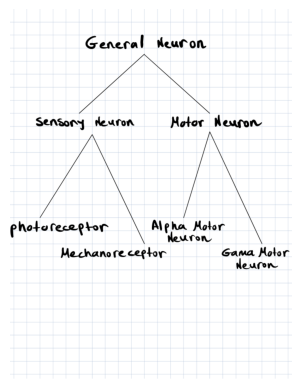

In [6]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

file_path = "__ newדיאגרמה פייתון_.pdf"

doc = fitz.open(file_path)

page = doc[0]
pix = page.get_pixmap()

img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

plt.imshow(img)
plt.axis('off')  
plt.show()


# Q1


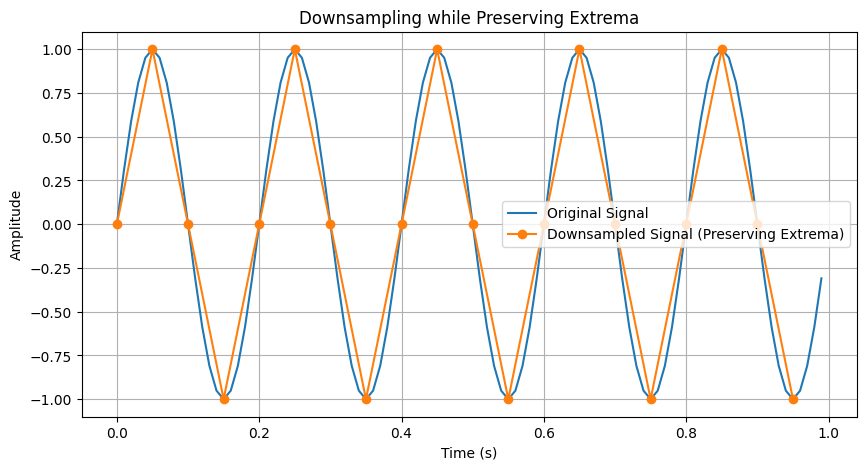

In [ ]:
import numpy as np

def downsample_preserving_extrema(signal, sample_rate):
    """
    Downsamples a sinusoidal signal while preserving maxima and minima.
    
    Args:
        signal (np.ndarray): Input sinusoidal signal.
        sample_rate (int): Downsampling rate (e.g., every 5th point).
        
    Returns:
        np.ndarray: Downsampled signal with maxima and minima preserved.
    """
    # Find indices of max and min
    maxima_indices = np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0] + 1
    minima_indices = np.where((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:]))[0] + 1

    # Combine max and min indices
    extrema_indices = np.sort(np.concatenate([maxima_indices, minima_indices]))
    
    # Select every `sample_rate` point and ensure extrema are included
    downsample_indices = np.arange(0, len(signal), sample_rate)
    combined_indices = np.sort(np.unique(np.concatenate([downsample_indices, extrema_indices])))

    return signal[combined_indices], combined_indices

# Generate sinusoidal signal
def generate_signal(frequency=5, duration=1, sampling_interval=0.01):
    t = np.arange(0, duration, sampling_interval)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

# Verification script
if __name__ == "__main__":
    # Generate a 5 Hz sinusoidal signal sampled at 0.01s
    t, signal = generate_signal()
    downsampled_signal, indices = downsample_preserving_extrema(signal, sample_rate=5)
    
    # Print results and plot for verification
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(t, signal, label="Original Signal")
    plt.plot(t[indices], downsampled_signal, 'o-', label="Downsampled Signal (Preserving Extrema)")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Downsampling while Preserving Extrema")
    plt.grid()
    plt.show()


# Q2

Columns in the file:
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

First rows in the file:
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U   

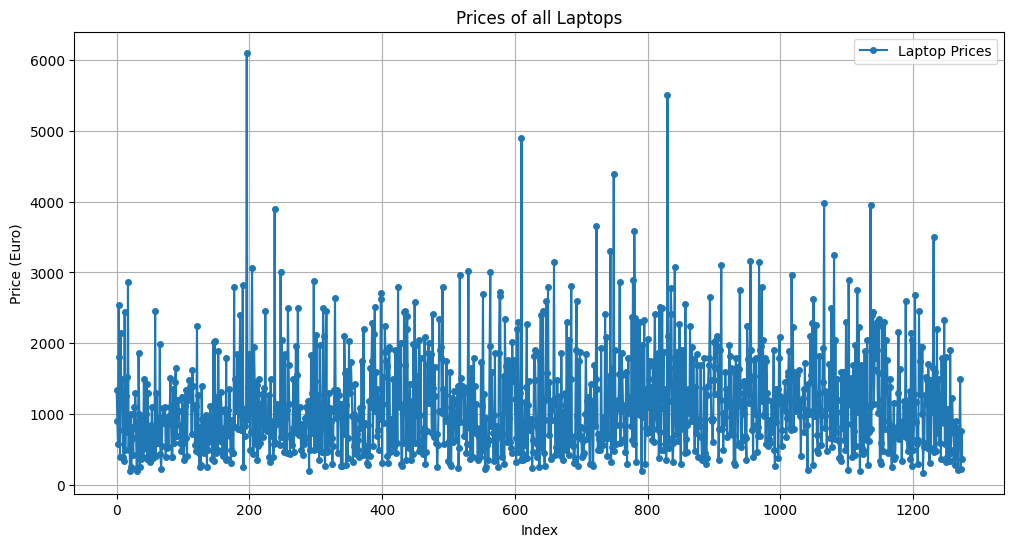

The company with the most expensive laptops on average is: Razer
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


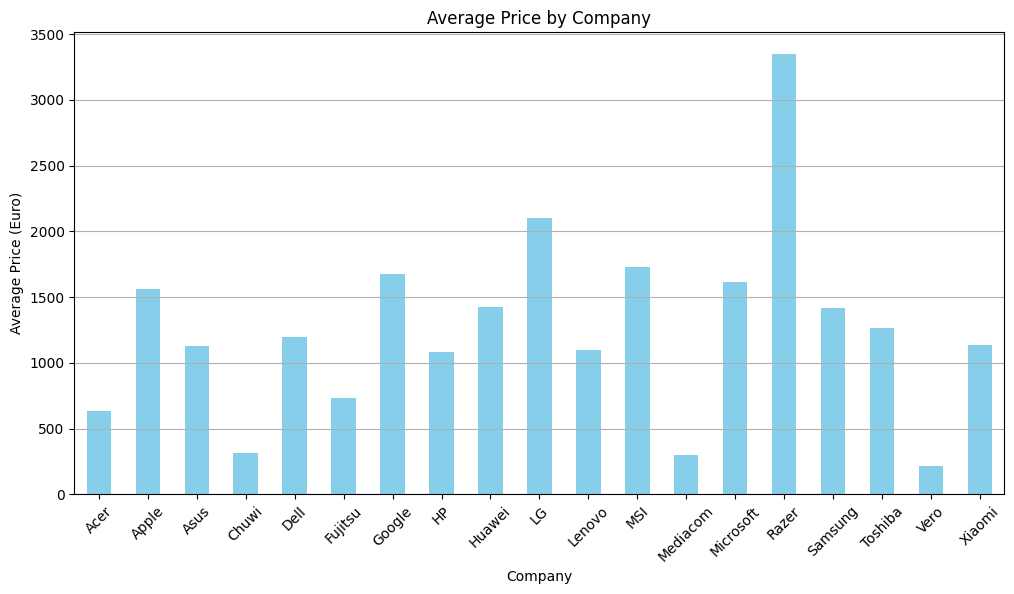

Unique operating systems: ['Other' 'Windows' 'MacOS' 'Linux' 'Chrome OS']


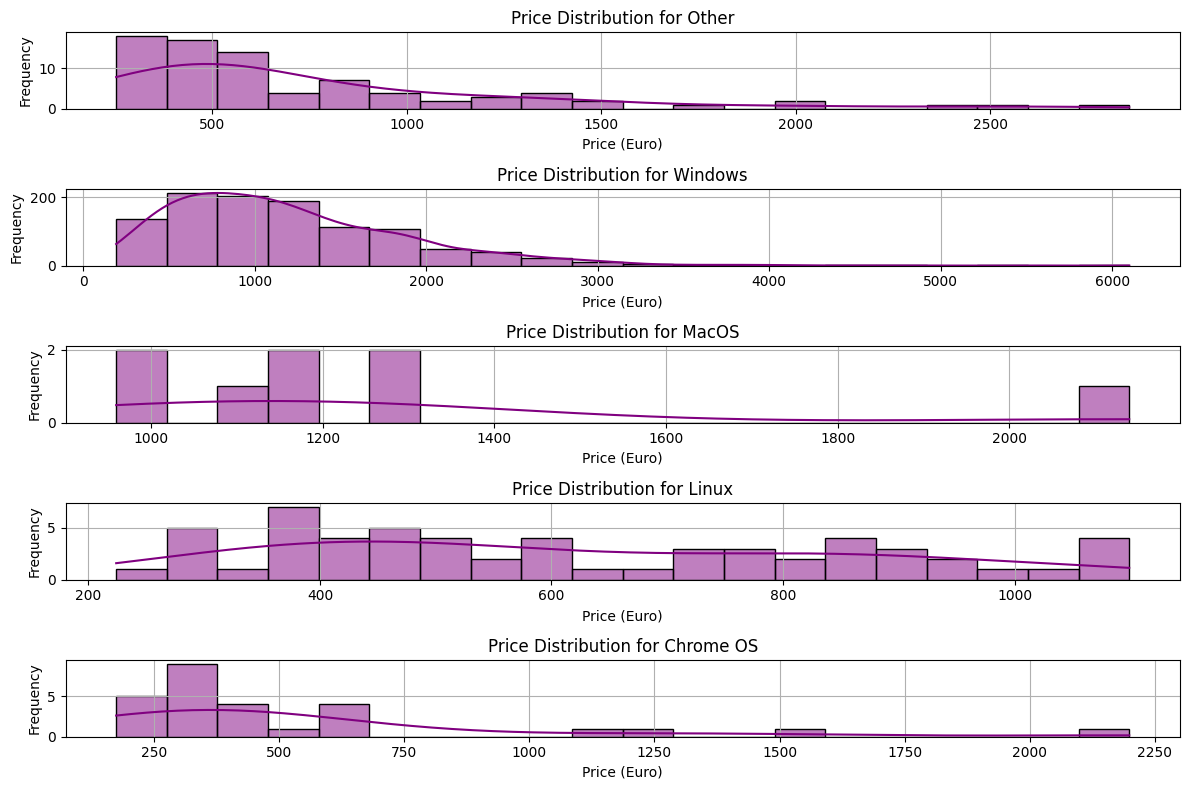

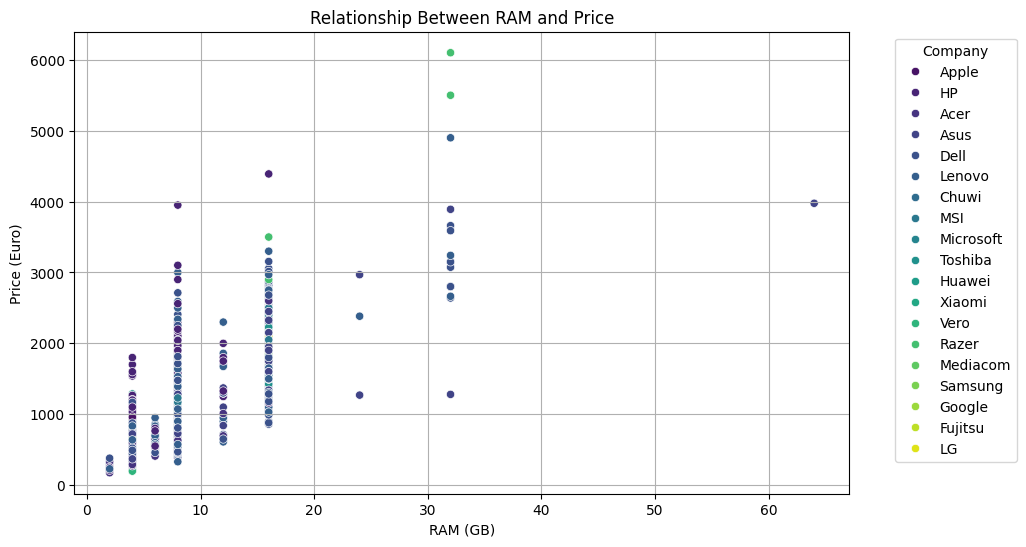

                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage        Flash
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading the file
os.chdir('C:\\Users\\linoy\\OneDrive\\שולחן העבודה\\MiniProject Python')
file_path = 'C:\\Users\\linoy\\OneDrive\\שולחן העבודה\\MiniProject Python\\laptop_price - dataset.csv'
data = pd.read_csv(file_path)

# Checking the columns and rows
print("Columns in the file:")
print(data.columns)

print("\nFirst rows in the file:")
print(data.head())

# Fixing column names (removing extra spaces)
data.columns = data.columns.str.strip()

# Tasks

# 1. Price graph for all laptops
plt.figure(figsize=(12, 6))
plt.plot(data['Price (Euro)'], label="Laptop Prices", marker='o', linestyle='-', markersize=4)
plt.title("Prices of all Laptops")
plt.xlabel("Index")
plt.ylabel("Price (Euro)")
plt.grid()
plt.legend()
plt.show()

# 2. The company with the most expensive laptops on average
avg_price_per_company = data.groupby('Company')['Price (Euro)'].mean()
most_expensive_company = avg_price_per_company.idxmax()
print(f"The company with the most expensive laptops on average is: {most_expensive_company}")
print(avg_price_per_company)

# Average price per company bar plot
avg_price_per_company.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Average Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price (Euro)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# 3. Identifying different operating systems
def standardize_opsys(op):
    if 'Windows' in op:
        return 'Windows'
    elif 'Mac' in op or 'MacOS' in op:
        return 'MacOS'
    elif 'Linux' in op:
        return 'Linux'
    elif 'Chrome' in op:
        return 'Chrome OS'
    else:
        return 'Other'

data['OpSys'] = data['OpSys'].apply(standardize_opsys)
unique_opsys = data['OpSys'].unique()
print(f"Unique operating systems: {unique_opsys}")

# Price distribution plot by operating system
plt.figure(figsize=(12, 8))
for i, os in enumerate(unique_opsys, 1):
    plt.subplot(len(unique_opsys), 1, i)
    sns.histplot(data[data['OpSys'] == os]['Price (Euro)'], kde=True, bins=20, color='purple')
    plt.title(f"Price Distribution for {os}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Frequency")
    plt.grid()
plt.tight_layout()
plt.show()

# 4. Relationship between RAM and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RAM (GB)'], y=data['Price (Euro)'], hue=data['Company'], palette='viridis')
plt.title("Relationship Between RAM and Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.grid()
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Creating a "Storage type" column
def extract_storage_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    elif 'Flash' in memory:
        return 'Flash'
    else:
        return 'Other'

data['Storage type'] = data['Memory'].apply(extract_storage_type)
print(data[['Memory', 'Storage type']].head())


# Bonus question

### Additional Questions to Analyze the Dataset:

1. How does screen size (Inches) impact laptop price?
Analysis: Explore the correlation between screen size and price to determine if larger screens result in higher prices.
Visualization: Scatter plot to visualize the relationship between screen size and price.

2. What are the most common CPU and GPU types in high-end laptops?
Analysis: Identify laptops priced above the 75th percentile as high-end laptops and analyze the distribution of CPU and GPU types.
Visualization: Bar charts to show the frequency of CPU and GPU types among high-end laptops.

3. How does weight impact portability and pricing?

4. Are certain companies more likely to produce high-RAM laptops?

5. What is the price distribution for laptops with hybrid storage types?

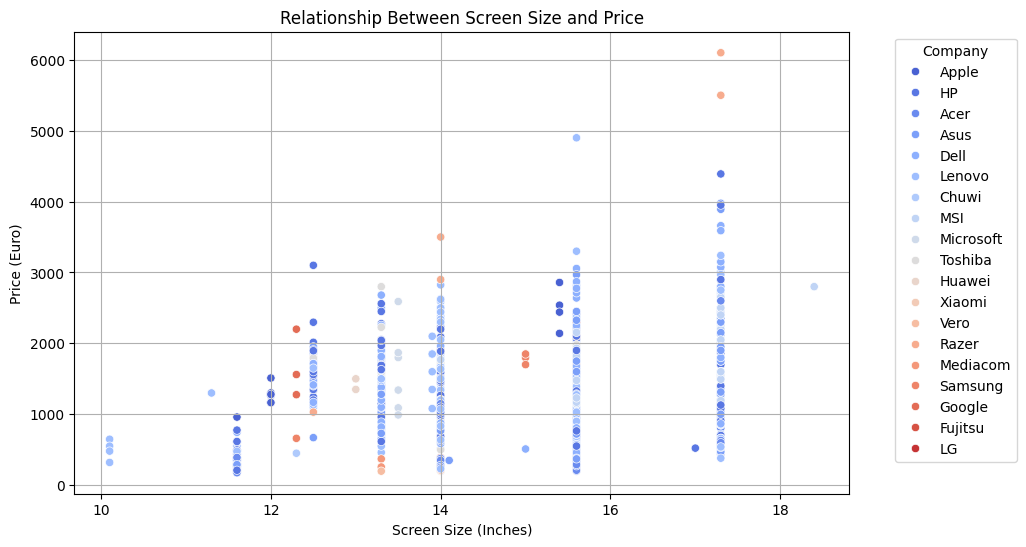

Correlation between screen size and price: 0.07


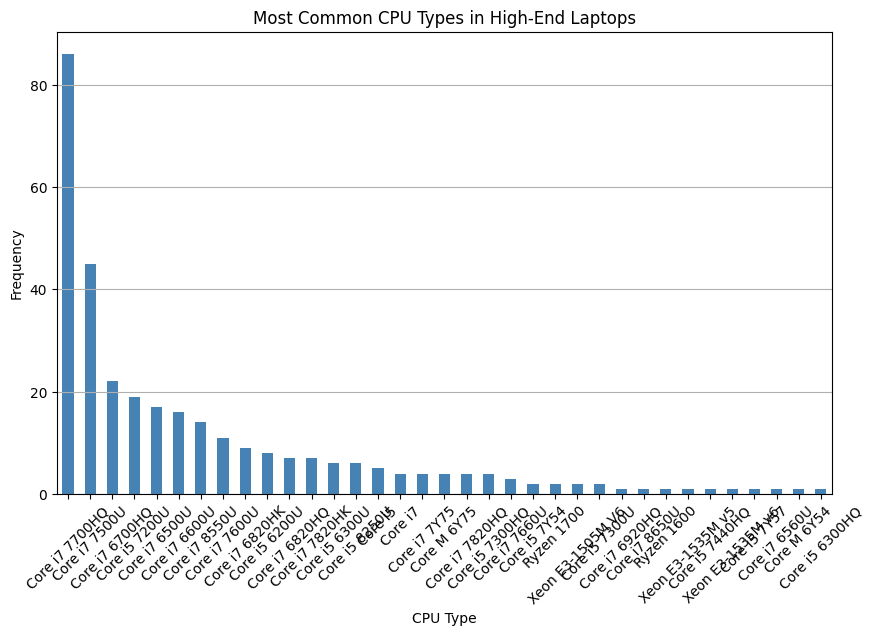

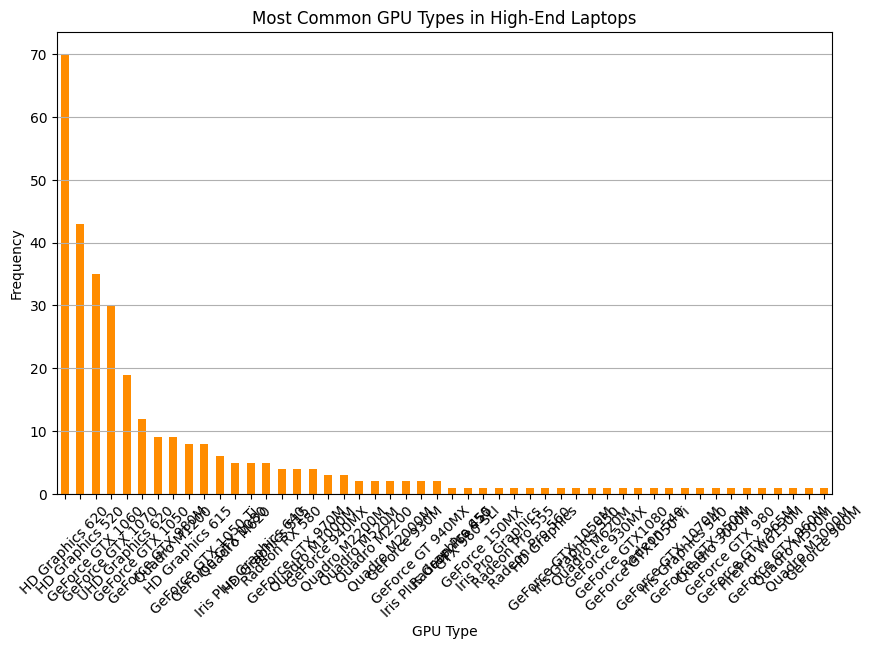

In [5]:
# Bonus Question 1: Relationship between screen size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Inches'], y=data['Price (Euro)'], hue=data['Company'], palette='coolwarm')
plt.title("Relationship Between Screen Size and Price")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Price (Euro)")
plt.grid()
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation coefficient between screen size and price
correlation = data['Inches'].corr(data['Price (Euro)'])
print(f"Correlation between screen size and price: {correlation:.2f}")

# Bonus Question 2: Most common CPU and GPU types in high-end laptops
# Define high-end laptops as laptops priced above the 75th percentile
high_end_threshold = data['Price (Euro)'].quantile(0.75)
high_end_laptops = data[data['Price (Euro)'] > high_end_threshold]

# Count CPU and GPU types among high-end laptops
cpu_counts = high_end_laptops['CPU_Type'].value_counts()
gpu_counts = high_end_laptops['GPU_Type'].value_counts()

# Plot CPU types
plt.figure(figsize=(10, 6))
cpu_counts.plot(kind='bar', color='steelblue')
plt.title("Most Common CPU Types in High-End Laptops")
plt.xlabel("CPU Type")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Plot GPU types
plt.figure(figsize=(10, 6))
gpu_counts.plot(kind='bar', color='darkorange')
plt.title("Most Common GPU Types in High-End Laptops")
plt.xlabel("GPU Type")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()
